In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import linear_model

In [32]:
data = pd.read_csv("Dataset/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Preprocessing: Scaling
### MinMaxScaler: X = (X - X.min()) / (X.max() - X.min())
convert the features into a scale of [0,1], and preserve its' original distribution

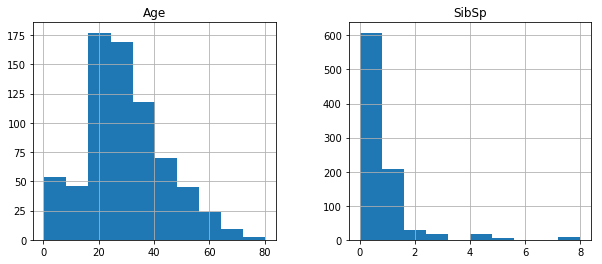

In [33]:
# before scaling:
data[['Age', 'SibSp']].hist(figsize = (10, 4))
plt.show()

In [34]:
data.shape

(891, 12)

In [35]:
data[['Age', 'SibSp']].dropna(inplace = True)
data.head()

/Users/jiahonghe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
# apply MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['Age', 'SibSp']])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Standard scaler: X = (X - X.mean()) / X.std()
convert X into standardized distribution with a mean of 0 and std of 1.   
after transformation, features on non-tree based models would be roughly similar.   
for models like KNN, the bigger the scale of the feature is, the more important it would be for the model.   
So we can optimize scaling parameters to boost features which would seems to be more important for us and see if this helps.   

# Feature Preprocessing: Outliers

(200, 1) (200,)


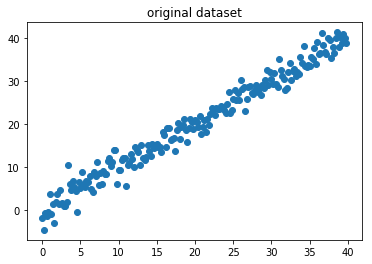

In [86]:
# generate data points
x = np.array([i for i in range(0, 200, 1)])/5
noise = np.random.normal(0, 2, 200)
y = x * 1 + noise
x = x.reshape(-1, 1)
print(x.shape, y.shape)
plt.scatter(x, y)
plt.title("original dataset")
plt.show()

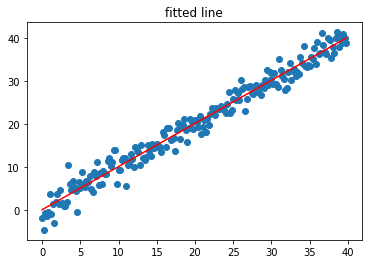

In [87]:
reg = linear_model.LinearRegression()
reg.fit(x, y)
predicted = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, predicted, c = 'r')
plt.title("fitted line")
plt.show()

(200, 1) (200,)


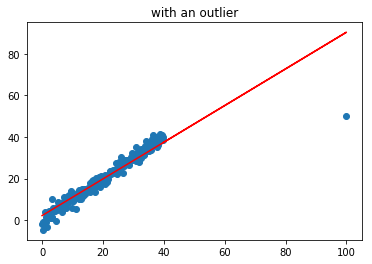

In [90]:
# add an outlier
y[20] = 50
print(x.shape, y.shape)
reg.fit(x, y)
predicted = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, predicted, c = 'r')
plt.title("with an outlier")
plt.show()

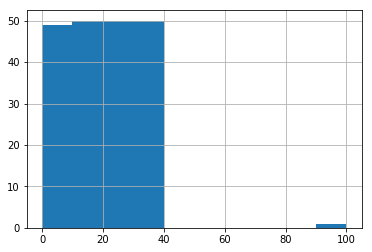

In [93]:
# to detect outliers:
x = x.reshape(-1, )
pd.Series(x).hist(bins = 10)
plt.show()

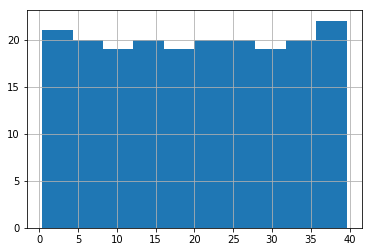

In [94]:
# to cut outliers out:
UPPERBOUND, LOWERBOUND = np.percentile(x, [1, 99])
x_clipped = np.clip(x, UPPERBOUND, LOWERBOUND)
pd.Series(x_clipped).hist(bins = 10)
plt.show()

# Preprocessing: Rank
Set spaces between proper assorted values to be equal.  
It can be better than MinMaxScaler if we have outliers, because rank transformation will move the outliers closer to other objects.  
example:  
rank([-100, 0, 1e5]) = [0, 1, 2]  
rank([1000, 1, 10]) = [2, 0, 1]    
If we apply rank to a sorted array, then it would change their values according to their indices, if applied to an unsorted array, it would sort the arrray , define mapping between values and indices in the source array, then change their values accoring to the mapping.  
Linear models, KNN and neural networks can benifit from this transformation if we have no time to handle outliers manually.    
rank can also be imported as a random data function from scipy.  
scipy,stats.rankdata  


# Preprocessing: log and square root transformation
Both can be useful because they drive too big values closer to the feature's average value. Along with this, the values around zero can become a bit more distinguishable.  
example:  
1. Log transformation  
np.log(1 + x)
 
2. Raising to the power < 1:  
np.sqrt(x + 2/3)

# Other Techniques
Sometimes it's uesful to train a model on concatenated data frames produced by different preprocessings. Or to mix models training differently-preprocessed data.

# Feature Generation: prior knowledge
example 1:  
Real Estate dataset   
the data we can contains:   
1. Price: 107000\$  
2. Squared Area: 55 m^2  
Then we can define and compute a new feature which is   
3. Price for 1m^2: 107000 / 55 \$/m^2  

example 2:    
price   fractional_part  
0.99    0.99
2.49    0.49  
1.0     0.00  
9.99    0.99  
The added part "fractional_part" can help the model utilize the differences in people's perception of these prices.  